## Importing Packages 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


## Loading Data 

In [2]:
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

In [3]:
train_data = []
train_labels = []
test_data = []
test_labels = []

In [4]:
image_size = 150
for i in labels:
  train_path= os.path.join("C:\\Users\\LENOVO G3\\Downloads\\Brain Tumor Classification\\Training",i)
  for j in tqdm(os.listdir(train_path)):
        img = cv2.imread(os.path.join(train_path,j))
        img = cv2.resize(img,(image_size,image_size))
        train_data.append(img)
        train_labels.append(i)
    
        

100%|██████████| 827/827 [00:02<00:00, 326.90it/s]


In [5]:
image_size = 150
for i in labels:
  test_path= os.path.join("C:\\Users\\LENOVO G3\\Downloads\\Brain Tumor Classification\\testing",i)
  for j in tqdm(os.listdir(test_path)):
        img = cv2.imread(os.path.join(test_path,j))
        img = cv2.resize(img,(image_size,image_size))
        test_data.append(img)
        test_labels.append(i)
    
        

100%|██████████| 74/74 [00:00<00:00, 156.20it/s]


## Data Preprocessing

### Data Visualization

In [6]:
import plotly.express as px
path="C:\\Users\\LENOVO G3\\Downloads\\Brain Tumor Classification\\Training"
label_info={}
# print(labels)
for name in labels:
    label_info[name] = len(os.listdir(path+f'\\{name}'))
print(label_info)  

{'glioma_tumor': 826, 'no_tumor': 395, 'meningioma_tumor': 822, 'pituitary_tumor': 827}


In [7]:
fig = px.pie(names=label_info.keys(),values=label_info.values(),title='Label Information')
fig.update_layout({'title':{"x":0.457}})
fig.show()

In [10]:
glimoa_train = os.listdir('C:\\Users\\LENOVO G3\\Downloads\\Brain Tumor Classification\\Training\\glioma_tumor')
meningioma_train = os.listdir('C:\\Users\\LENOVO G3\\Downloads\\Brain Tumor Classification\\Training\\meningioma_tumor')
no_tumor_train = os.listdir('C:\\Users\\LENOVO G3\\Downloads\\Brain Tumor Classification\\Training\\no_tumor')
pituitory_train = os.listdir('C:\\Users\\LENOVO G3\\Downloads\\Brain Tumor Classification\\Training\\pituitary_tumor')

<AxesSubplot: >

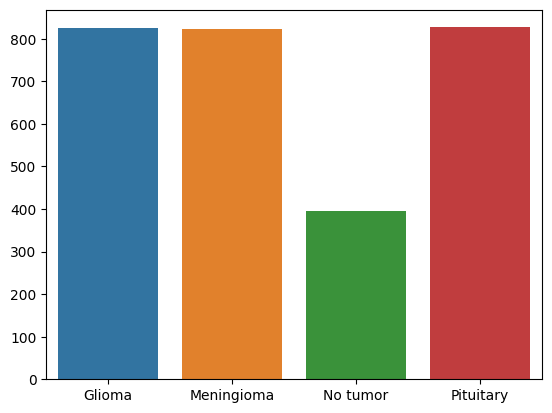

In [11]:
import seaborn as sn
classes = ["Glioma", "Meningioma", "No tumor", "Pituitary"]
numbers = [len(glimoa_train),len(meningioma_train),len(no_tumor_train),len(pituitory_train)]
sn.barplot(x=classes,y = numbers)

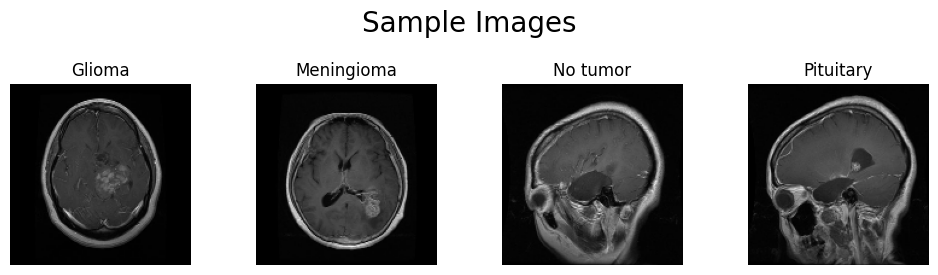

In [12]:
plt.figure(figsize = (10,3))
plt.suptitle('Sample Images', fontsize=20)
for i,j in enumerate(train_data):
    if i<4:
        plt.subplot(1,4,i+1)
        plt.imshow(j)
        plt.title(classes[i])
        plt.tight_layout()
        plt.axis('off')
    else:
        break

In [ ]:
train_data = np.array(train_data)
train_labels = np.array(train_labels)

test_data = np.array(test_data)
test_labels = np.array(test_labels)

### Data Normalization

In [ ]:
train_data=train_data/255.0
test_data=test_data/255.0

In [ ]:
train_data[0].shape


In [ ]:
test_data[0].shape

In [ ]:
train_data, train_labels = shuffle(train_data, train_labels, random_state=0)
test_data, test_labels = shuffle(test_data, test_labels, random_state=0)

### Generating new data

In [ ]:
train_datagen = ImageDataGenerator(        
        fill_mode="nearest",
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.1
)
test_datagen = ImageDataGenerator()


train_ds = train_datagen.flow(
  train_data, train_labels,
  subset="training",
  shuffle=True,
  batch_size=20)
val_ds = train_datagen.flow(
  train_data, train_labels,
  subset="validation",
  shuffle=True,
  batch_size=20)
test_ds = test_datagen.flow(
  test_data, test_labels,
  shuffle=False,
  batch_size=20)

In [ ]:
le = LabelEncoder()
test_labels = le.fit_transform(test_labels)
test_labels = to_categorical(test_labels,4)

### Model Building

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [ ]:
resnet_model = ResNet50(weights='imagenet', input_shape=(150,150,3), include_top=False)
# Set all layers to non-trainable
for layer in resnet_model.layers[:171]:
    layer.trainable = False

for layer in resnet_model.layers[171:]:
    layer.trainable = True

In [ ]:
model = Sequential([
    resnet_model,
    Flatten(),
    Dropout(0.25),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(4, activation='softmax')
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
model.summary()


In [ ]:
model.summary() #Summarize CNN Structure

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Model Training

In [ ]:
datagen.fit(train_data)

In [ ]:
history = model.fit(train_data,train_labels,validation_split=0.1, epochs =100, verbose=1, batch_size=32)

### Testing 

In [ ]:
pred = cnn.predict(test_ds)
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(pred.argmax(axis=1),test_labels.argmax(axis=1))

In [ ]:
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Reds):
    plt.figure(figsize=(10,10))
    plt.imshow(cm, cmap=cmap)
    plt.colorbar()
    plt.xticks(range(len(classes)), classes, rotation=45)
    plt.yticks(range(len(classes)), classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    [plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black") for i, j in itertools.product(range(len(classes)), repeat=2)]
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
